In [50]:
import numpy as np
import glob, os
import re
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [51]:
def jpeg_to_8_bit_greyscale(path, maxsize):

#         img = Image.open(path).convert('L')   # convert image to 8-bit grayscale
        img = Image.open(path)   # convert image to 8-bit grayscale

        # Make aspect ratio as 1:1, by applying image crop.

    # Please note, croping works for this data set, but in general one

    # needs to locate the subject and then crop or scale accordingly.

        WIDTH, HEIGHT = img.size

        if WIDTH != HEIGHT:

                m_min_d = min(WIDTH, HEIGHT)

                img = img.crop((0, 0, m_min_d, m_min_d))

        # Scale the image to the requested maxsize by Anti-alias sampling.

        img.thumbnail(maxsize, PIL.Image.ANTIALIAS)

        return np.asarray(img)

In [52]:
def load_image_dataset(path_dir, maxsize):

        images = []

        labels = []

        os.chdir(path_dir)

        for file in glob.glob("*.png"):

                img = jpeg_to_8_bit_greyscale(file, maxsize)

                if re.match('HourseMackerel*', file):

                        images.append(img)

                        labels.append(0)

                elif re.match('RedMullet*', file):

                        images.append(img)

                        labels.append(1)
                        
                elif re.match('Shrimp*', file):

                        images.append(img)

                        labels.append(2)

        return (np.asarray(images), np.asarray(labels))



In [53]:
maxsize = 50, 50
(train_images, train_labels) = load_image_dataset('/media/jhonat/Home/documentos/UFRN/9-semestres-engcomp/INTELIGÊNCIA ARTIFICIAL/artificial-intelligence/machineLearning/deepLearning/dataset/peixes/Fish_Dataset/train', maxsize)
(test_images, test_labels) = load_image_dataset('/media/jhonat/Home/documentos/UFRN/9-semestres-engcomp/INTELIGÊNCIA ARTIFICIAL/artificial-intelligence/machineLearning/deepLearning/dataset/peixes/Fish_Dataset/test', maxsize)

In [54]:
class_names = ['HourseMackerel', 'RedeMullet', 'Shrimp']

In [55]:
train_images.shape

(1200, 50, 50, 3)

In [56]:
print(train_labels)

[0 0 0 ... 2 2 2]


In [57]:
test_images.shape

(297, 50, 50, 3)

In [58]:
print(test_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


In [61]:
def display_images(images, labels):

        plt.figure(figsize=(10,10))

        grid_size = min(25, len(images))

        for i in range(grid_size):

                plt.subplot(5, 5, i+1)

                plt.xticks([])

                plt.yticks([])

                plt.grid(False)

                plt.imshow(images[i], cmap=plt.cm.binary)

                plt.xlabel(class_names[labels[i]])

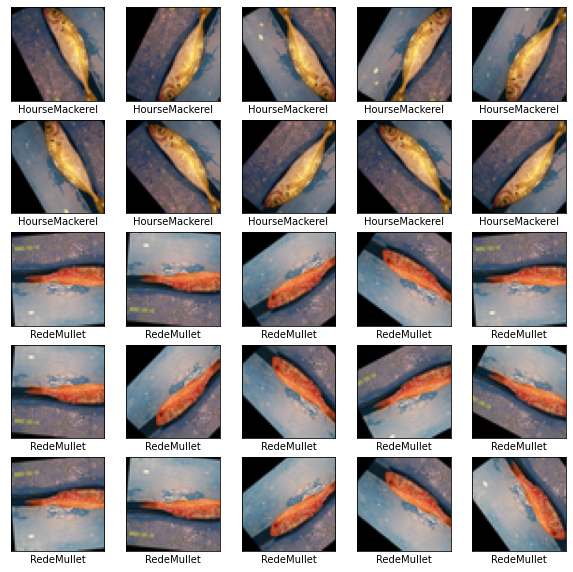

In [62]:
display_images(train_images, train_labels)

plt.show()

In [63]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [64]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          18496     
Total params: 38,752
Trainable params: 38,752
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [68]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [69]:
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
38/38 [==============================] - 7s 156ms/step - loss: 1.6659 - accuracy: 0.2893 - val_loss: 1.0919 - val_accuracy: 0.3333
Epoch 2/20
38/38 [==============================] - 6s 149ms/step - loss: 1.0468 - accuracy: 0.4725 - val_loss: 0.9777 - val_accuracy: 0.5791
Epoch 3/20
38/38 [==============================] - 6s 154ms/step - loss: 0.8144 - accuracy: 0.6513 - val_loss: 0.8785 - val_accuracy: 0.5253
Epoch 4/20
38/38 [==============================] - 6s 148ms/step - loss: 0.4508 - accuracy: 0.8248 - val_loss: 0.9472 - val_accuracy: 0.6330
Epoch 5/20
38/38 [==============================] - 6s 159ms/step - loss: 0.2438 - accuracy: 0.9214 - val_loss: 0.9477 - val_accuracy: 0.6532
Epoch 6/20
38/38 [==============================] - 6s 153ms/step - loss: 0.1637 - accuracy: 0.9537 - val_loss: 1.0826 - val_accuracy: 0.5825
Epoch 7/20
38/38 [==============================] - 6s 155ms/step - loss: 0.1238 - accuracy: 0.9536 - val_loss: 1.2582 - val_accuracy: 0.6195
Epoch 

10/10 - 0s - loss: 0.8425 - accuracy: 0.8384


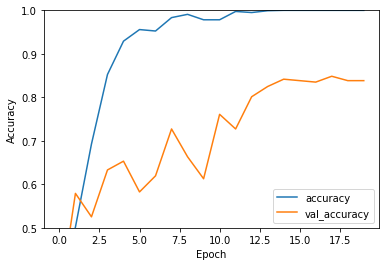

In [70]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [71]:
print(history.history)

{'loss': [1.338314175605774, 1.028701663017273, 0.724541425704956, 0.40357813239097595, 0.21886014938354492, 0.14984162151813507, 0.12694808840751648, 0.07250352948904037, 0.038215093314647675, 0.062203820794820786, 0.07664142549037933, 0.01994151994585991, 0.021300341933965683, 0.00926402397453785, 0.004908433649688959, 0.004088140558451414, 0.0023254803381860256, 0.002006898634135723, 0.0018258985364809632, 0.0013698502443730831], 'accuracy': [0.3558333218097687, 0.5016666650772095, 0.6924999952316284, 0.8525000214576721, 0.9291666746139526, 0.9558333158493042, 0.9524999856948853, 0.9833333492279053, 0.9908333420753479, 0.9783333539962769, 0.9783333539962769, 0.9975000023841858, 0.9950000047683716, 0.9991666674613953, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [1.0918818712234497, 0.9776639938354492, 0.8785436153411865, 0.9472134113311768, 0.9476734399795532, 1.0825798511505127, 1.2581820487976074, 0.9229313731193542, 0.8666855692863464, 1.4429727792739868, 0.9651896953582764, 0.7972

In [72]:
#PERFORM THE PREDICTION UPON THE DATA
predictions = model.predict(test_images)

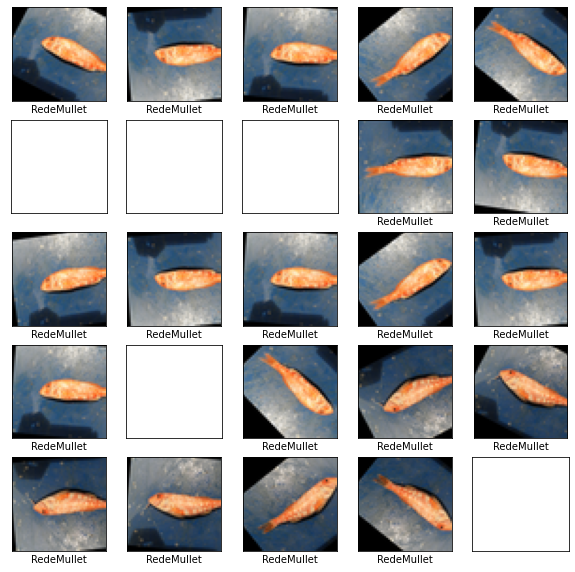

In [75]:
#VISUAL EVALUATION OF THE MODEL
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if np.int(np.around(predictions[i][0])) >= 0 and np.int(np.around(predictions[i][0])) <= 9:
        plt.imshow(test_images[i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        t = np.argmax(predictions, axis=1)
        plt.xlabel(class_names[t[i]])
plt.show()

In [ ]:
model.save('model_fish')